In [1266]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics

In [1267]:
df = pd.read_csv('Property_structured_data.csv')

In [1268]:
initial_df = df.shape

In [1269]:
initial_df_columns = df.columns.to_list()

## Clean Database

### Price (float)

In [1270]:
z_scores_price = stats.zscore(df['price'])
abs_z_scores_price = np.abs(z_scores_price) 
filtered_entries_price = (abs_z_scores_price < 3)
df = df[filtered_entries_price]

In [1271]:
df.loc[df["price"] >= 800000, "type_of_property"] = "OTHER"

In [1272]:
df= df.loc[df['price'] != -1]
df.shape

(58318, 23)

### Surface (float)

In [1273]:
df = df.loc[df['surface'] <= 800]

In [1274]:
df = df.loc[df['surface'] != -1]
df.shape

(48239, 23)

### Sub Type of property (filter and drop)

In [1275]:
df['subtype_of_property'].value_counts()

HOUSE                   20452
APARTMENT               15686
VILLA                    2701
APARTMENT_BLOCK          1322
DUPLEX                   1220
GROUND_FLOOR             1135
PENTHOUSE                 968
MIXED_USE_BUILDING        927
FLAT_STUDIO               692
EXCEPTIONAL_PROPERTY      511
SERVICE_FLAT              483
MANSION                   437
TOWN_HOUSE                375
COUNTRY_COTTAGE           293
BUNGALOW                  242
LOFT                      225
FARMHOUSE                 147
TRIPLEX                   114
CHALET                    107
OTHER_PROPERTY             67
MANOR_HOUSE                61
KOT                        58
CASTLE                     15
PAVILION                    1
Name: subtype_of_property, dtype: int64

In [1276]:
df= df.loc[df['subtype_of_property'] != 'APARTMENT_BLOCK']
df.shape

(46917, 23)

In [1277]:
df= df.loc[df['subtype_of_property'] != 'MIXED_USE_BUILDING']
df.shape

(45990, 23)

### Number of bedrooms (int)

In [1278]:
df = df.loc[df['number_of_bedrooms'] <200]


In [1279]:
df['number_of_bedrooms'] = df['number_of_bedrooms'].replace(-1,0)

In [1280]:
df['number_of_bedrooms'].value_counts()

3     15099
2     14672
4      6747
1      4870
5      2450
6       873
0       735
7       261
8       129
9        75
10       31
11       19
12        7
13        5
14        4
17        3
15        2
16        2
30        1
18        1
66        1
31        1
Name: number_of_bedrooms, dtype: int64

### Zip Code (category)

#### XX

In [1281]:
df['zip_code_xx'] = df['postal_code'].apply(lambda x : 'be_zip_'+str(x)[:2])

In [1282]:
df['zip_code_xx'].value_counts()

be_zip_10    3367
be_zip_11    1517
be_zip_83    1452
be_zip_20    1290
be_zip_84    1270
             ... 
be_zip_42     160
be_zip_79     131
be_zip_76     109
be_zip_47      85
be_zip_64      52
Name: zip_code_xx, Length: 80, dtype: int64

#### X

In [1283]:
df['zip_code_x'] = df['postal_code'].apply(lambda x : 'be_zip_'+str(x)[:1])

In [1284]:
df['zip_code_x'].value_counts()

be_zip_1    9631
be_zip_2    7632
be_zip_8    6871
be_zip_9    6247
be_zip_3    4036
be_zip_4    3712
be_zip_7    3074
be_zip_6    3045
be_zip_5    1740
Name: zip_code_x, dtype: int64

### Land surface (float)

In [1285]:
#df.loc[(df['land_surface'] == -1) & (df['garden_surface'] > 0 )]

In [1286]:
df['land_surface'] = [land_surface if land_surface != -1 else garden_surface if garden_surface > 0 else land_surface for garden_surface,land_surface in zip(df['garden_surface'],df['land_surface'])]

In [1287]:
df['land_surface'] = df['land_surface'].replace(-1,0)

In [1288]:
df['land_surface'].value_counts()

0       21400
100       207
200       190
300       158
150       152
        ...  
2641        1
2054        1
1965        1
3068        1
4233        1
Name: land_surface, Length: 3308, dtype: int64

### Garden (0,1)

In [1289]:
df['garden'] = df['garden'].replace(-1,0)

In [1290]:
df['garden'].value_counts()

0    30215
1    15773
Name: garden, dtype: int64

### Garden surface (float)

In [1291]:
df['garden_surface'] = df['garden_surface'].replace(-1,0)
df['garden_surface'] = df['garden_surface'].replace(1,0)

In [1292]:
df['garden_surface'].value_counts()

0        36348
100        299
200        266
50         196
300        192
         ...  
2267         1
586          1
10997        1
737          1
7200         1
Name: garden_surface, Length: 1352, dtype: int64

### Fully equiped kitchen  (0,1)

In [1293]:
#df["fully_equipped_kitchen"] = df["fully_equipped_kitchen"].map({"-1.0": 0.25, "1.0": 1,"-1": 0.25, "1": 1, "INSTALLED": 0.5, "SEMI_EQUIPPED": 0.75, "NOT_INSTALLED": 0, "USA_INSTALLED": 0.5, "USA_SEMI_EQUIPPED": 0.75, "USA_UNINSTALLED": 0})

In [1294]:
df["fully_equipped_kitchen"] = df["fully_equipped_kitchen"].map({"-1.0": 0, "1.0": 1,"-1": 0, "1": 1, "INSTALLED": 0, "SEMI_EQUIPPED": 1, "NOT_INSTALLED": 0, "USA_INSTALLED": 0, "USA_SEMI_EQUIPPED": 1, "USA_UNINSTALLED": 0})

In [1295]:
df["fully_equipped_kitchen"].value_counts()

0    33721
1    12267
Name: fully_equipped_kitchen, dtype: int64

### Swiming pool  (0,1)

In [1296]:
df['swimming_pool'] = df['swimming_pool'].replace(-1,0)

In [1297]:
df['swimming_pool'].value_counts()

0    45052
1      936
Name: swimming_pool, dtype: int64

### Furnished (0,1)

In [1298]:
df['furnished'] = df['furnished'].replace(-1,0)

In [1299]:
df['furnished'].value_counts()

0    44783
1     1205
Name: furnished, dtype: int64

### Open fire (0,1)

In [1300]:
df['open_fire'] = df['open_fire'].replace(-1,0)

In [1301]:
df['open_fire'].value_counts()

0    43920
1     2068
Name: open_fire, dtype: int64

### Terrace (0,1)

In [1302]:
df['terrace'] = df['terrace'].replace(-1,0)

In [1303]:
df['terrace'].value_counts()

1    29302
0    16686
Name: terrace, dtype: int64

### Terrace surface (float)

we have two terraces > 1000 m2 !

In [1304]:
df = df.loc[df['terrace_surface'] < 500]

In [1305]:
df['terrace_surface'] = df['terrace_surface'].replace(-1,0)

In [1306]:
df['terrace_surface'].value_counts()

0      26713
20      1191
10      1084
15       939
12       868
       ...  
163        1
137        1
190        1
293        1
290        1
Name: terrace_surface, Length: 183, dtype: int64

### Facades (int)

In [1307]:
df = df.loc[df["number_of_facades"] < 9]

In [1308]:
df["number_of_facades"] = np.where((df["number_of_facades"] == -1) & (df["type_of_property"] == "APARTMENT"), 1, df["number_of_facades"])
df["number_of_facades"] = np.where((df["number_of_facades"] == -1) & (df["type_of_property"] == "HOUSE"), 2, df["number_of_facades"])

In [1309]:
df = df.loc[df["number_of_facades"] != -1]

In [1310]:
df['number_of_facades'].value_counts()

2    20272
4     9268
3     8129
1     7777
6        6
5        6
8        3
Name: number_of_facades, dtype: int64

### State of the building (category)

Tranform this part to category

In [1311]:
df["state_of_the_building"] = df["state_of_the_building"].map({
    "NO_INFO": "TO_RENOVATE",#0.25, 
    "TO_BE_DONE_UP": "JUST_RENOVATED",#0.75, 
    "TO_RENOVATE": "TO_RENOVATE",#0.25, 
    "TO_RESTORE": "TO_REBUILD",#0.25, 
    "JUST_RENOVATED": "JUST_RENOVATED",#0.75, 
    "GOOD": "GOOD",#0.5, 
    "AS_NEW": "NEW"#1.0
})

In [1312]:
df["state_of_the_building"].value_counts()

TO_RENOVATE       16151
GOOD              12534
NEW               10559
JUST_RENOVATED     6035
TO_REBUILD          182
Name: state_of_the_building, dtype: int64

### Type of property (category)

Separate into HOUSE, APARTMENTS and OTHERS

In [1313]:
others = ["CHALET", "MANOR_HOUSE", "OTHER_PROPERTY", "CASTLE", "PAVILION"]

In [1314]:
df.loc[df["price"] >= 800000, "type_of_property"] = "OTHER"

In [1315]:
df['type_of_property'] = np.where((df['number_of_bedrooms'] > 20), "OTHER", df['type_of_property'])

In [1316]:
df.loc[df["subtype_of_property"].isin(others), "type_of_property"] = "OTHER"

In [1317]:
df['type_of_property'].value_counts()

HOUSE        23527
APARTMENT    19808
OTHER         2126
Name: type_of_property, dtype: int64

In [1318]:
df_other = df.loc[df["type_of_property"] == "OTHER"]

In [1319]:
df = df.loc[df["type_of_property"] == "HOUSE"]

In [1320]:
df.describe()

,id,postal_code,price,number_of_bedrooms,surface,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_surface,garden,garden_surface,land_surface,number_of_facades,swimming_pool
count,2.352700e+04,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,2.352700e+04,23527.000000,23527.00000
mean,1.000478e+07,5379.434352,346334.115357,3.345050,186.139159,0.245760,0.011349,0.061079,0.566583,9.270710,0.505504,169.307604,8.088920e+02,2.782165,0.02002
std,2.228319e+05,2828.356500,159784.282305,1.175656,81.895317,0.430546,0.105926,0.239480,0.495557,20.799314,0.499980,792.579611,7.954382e+03,0.845464,0.14007
min,1.882546e+06,1000.000000,2500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.00000
25%,9.972600e+06,2820.000000,229000.000000,3.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.550000e+02,2.000000,0.00000
50%,1.006888e+07,5060.000000,325000.000000,3.000000,170.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.600000e+02,3.000000,0.00000
75%,1.011784e+07,8310.000000,439000.000000,4.000000,218.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,78.000000,7.920000e+02,4.000000,0.00000
max,1.015115e+07,9992.000000,799950.000000,17.000000,800.000000,1.000000,1.000000,1.000000,1.000000,420.000000,1.000000,55000.000000,1.100000e+06,6.000000,1.00000


### Price/m2

In [1321]:
df['price_m2'] = df['price']/df['surface']

In [1322]:
df['price_m2'].value_counts()

2500.000000    108
2000.000000    103
1500.000000     86
1000.000000     69
1250.000000     66
              ... 
2584.269663      1
1935.344828      1
4364.406780      1
3818.681319      1
1705.038760      1
Name: price_m2, Length: 12338, dtype: int64

### API list

In [1323]:
api_list = ['surface','number_of_bedrooms','postal_code','land_surface','garden','garden_surface','fully_equipped_kitchen','swimming_pool','furnished','open_fire','terrace','terrace_surface','number_of_facades','state_of_the_building','zip_code_xx','zip_code_x','price']

In [1324]:
df = df[api_list]

In [1325]:
claned_df = df.shape

## Check database

In [1326]:
print(f'initial_df {initial_df} claned_df {claned_df}')

initial_df (62430, 23) claned_df (23527, 17)


In [1327]:
df.describe()

,surface,number_of_bedrooms,postal_code,land_surface,garden,garden_surface,fully_equipped_kitchen,swimming_pool,furnished,open_fire,terrace,terrace_surface,number_of_facades,price
count,23527.000000,23527.000000,23527.000000,2.352700e+04,23527.000000,23527.000000,23527.000000,23527.00000,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000,23527.000000
mean,186.139159,3.345050,5379.434352,8.088920e+02,0.505504,169.307604,0.245760,0.02002,0.011349,0.061079,0.566583,9.270710,2.782165,346334.115357
std,81.895317,1.175656,2828.356500,7.954382e+03,0.499980,792.579611,0.430546,0.14007,0.105926,0.239480,0.495557,20.799314,0.845464,159784.282305
min,1.000000,0.000000,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2500.000000
25%,135.000000,3.000000,2820.000000,1.550000e+02,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,229000.000000
50%,170.000000,3.000000,5060.000000,3.600000e+02,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,3.000000,325000.000000
75%,218.000000,4.000000,8310.000000,7.920000e+02,1.000000,78.000000,0.000000,0.00000,0.000000,0.000000,1.000000,13.000000,4.000000,439000.000000
max,800.000000,17.000000,9992.000000,1.100000e+06,1.000000,55000.000000,1.000000,1.00000,1.000000,1.000000,1.000000,420.000000,6.000000,799950.000000


In [1328]:
for index,atribute in enumerate(df.columns.to_list()):
    print(atribute)
    print(df[df.columns.to_list()[index]].value_counts())
    print('\n')

surface
150    700
160    562
200    554
180    547
140    518
      ... 
788      1
705      1
612      1
549      1
595      1
Name: surface, Length: 568, dtype: int64


number_of_bedrooms
3     10648
4      5698
2      3691
5      1927
6       625
1       466
7       170
0       133
8        84
9        46
10       14
11       11
12        5
16        2
13        2
15        2
14        2
17        1
Name: number_of_bedrooms, dtype: int64


postal_code
9000    273
7700    199
9300    186
4000    166
9500    151
       ... 
3471      1
3798      1
3211      1
3512      1
7543      1
Name: postal_code, Length: 1036, dtype: int64


land_surface
0       2214
100      160
200      146
160      143
300      138
        ... 
1571       1
2122       1
3104       1
4848       1
5414       1
Name: land_surface, Length: 2809, dtype: int64


garden
1    11893
0    11634
Name: garden, dtype: int64


garden_surface
0       15987
100       246
200       219
300       167
500       152
        ... 

# Data preprocessing

In [1329]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['zip_code_x','state_of_the_building']),
    remainder='passthrough')

In [1330]:
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

/home/roku/Documents/becode_projects/challenge-regression/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1331]:
transformed_df.columns.to_list()

['onehotencoder__x0_be_zip_1',
 'onehotencoder__x0_be_zip_2',
 'onehotencoder__x0_be_zip_3',
 'onehotencoder__x0_be_zip_4',
 'onehotencoder__x0_be_zip_5',
 'onehotencoder__x0_be_zip_6',
 'onehotencoder__x0_be_zip_7',
 'onehotencoder__x0_be_zip_8',
 'onehotencoder__x0_be_zip_9',
 'onehotencoder__x1_GOOD',
 'onehotencoder__x1_JUST_RENOVATED',
 'onehotencoder__x1_NEW',
 'onehotencoder__x1_TO_REBUILD',
 'onehotencoder__x1_TO_RENOVATE',
 'surface',
 'number_of_bedrooms',
 'postal_code',
 'land_surface',
 'garden',
 'garden_surface',
 'fully_equipped_kitchen',
 'swimming_pool',
 'furnished',
 'open_fire',
 'terrace',
 'terrace_surface',
 'number_of_facades',
 'zip_code_xx',
 'price']

### Drop values from onehotencoder

In [1332]:
drop_list = [
 'onehotencoder__x0_be_zip_1',
#  'onehotencoder__x0_be_zip_2',
 'onehotencoder__x0_be_zip_3',
 'onehotencoder__x0_be_zip_4',
 'onehotencoder__x0_be_zip_5',
 'onehotencoder__x0_be_zip_6',
 'onehotencoder__x0_be_zip_7',
 'onehotencoder__x0_be_zip_8',
 'onehotencoder__x0_be_zip_9',
#  'onehotencoder__x1_GOOD',
 'onehotencoder__x1_JUST_RENOVATED',
 'onehotencoder__x1_NEW',
 'onehotencoder__x1_TO_REBUILD',
 'onehotencoder__x1_TO_RENOVATE',
 'surface',
 'number_of_bedrooms',
#  'postal_code',
#  'land_surface',
 'garden',
 'garden_surface',
 'fully_equipped_kitchen',
 'swimming_pool',
#  'furnished',
 'open_fire',
#  'terrace',
#  'terrace_surface',
 'number_of_facades',
 #'zip_code_xx',
 'price']

In [1333]:
transformed_df = transformed_df[drop_list]

In [1334]:
for index,atribute in enumerate(transformed_df.columns.to_list()):
    print(atribute)
    print(transformed_df[transformed_df.columns.to_list()[index]].value_counts())
    print('\n')

onehotencoder__x0_be_zip_1
0.0    20183
1.0     3344
Name: onehotencoder__x0_be_zip_1, dtype: int64


onehotencoder__x0_be_zip_3
0.0    21157
1.0     2370
Name: onehotencoder__x0_be_zip_3, dtype: int64


onehotencoder__x0_be_zip_4
0.0    20998
1.0     2529
Name: onehotencoder__x0_be_zip_4, dtype: int64


onehotencoder__x0_be_zip_5
0.0    22290
1.0     1237
Name: onehotencoder__x0_be_zip_5, dtype: int64


onehotencoder__x0_be_zip_6
0.0    21246
1.0     2281
Name: onehotencoder__x0_be_zip_6, dtype: int64


onehotencoder__x0_be_zip_7
0.0    21272
1.0     2255
Name: onehotencoder__x0_be_zip_7, dtype: int64


onehotencoder__x0_be_zip_8
0.0    20974
1.0     2553
Name: onehotencoder__x0_be_zip_8, dtype: int64


onehotencoder__x0_be_zip_9
0.0    19895
1.0     3632
Name: onehotencoder__x0_be_zip_9, dtype: int64


onehotencoder__x1_JUST_RENOVATED
0.0    19694
1.0     3833
Name: onehotencoder__x1_JUST_RENOVATED, dtype: int64


onehotencoder__x1_NEW
0.0    19780
1.0     3747
Name: onehotencoder__x

# Split Data

In [1335]:
y = transformed_df.iloc[:,-1].values  #price
x = transformed_df.iloc[:,:-1].values  #rest

In [1337]:
x = x.astype(int)

ValueError: invalid literal for int() with base 10: 'TO_RENOVATE'

In [ ]:
y = y.astype(int)

# Linear regresion

### First split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [ ]:
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)

In [ ]:
print("x_train:",x_train.shape)
print("x_dev:",x_dev.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_dev:",y_dev.shape)
print("y_test:",y_test.shape)

x_train: (15056, 20)
x_dev: (3765, 20)
x_test: (4706, 20)
y_train: (15056,)
y_dev: (3765,)
y_test: (4706,)


### Train the model

In [ ]:
MLR = LinearRegression()

In [ ]:
MLR.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(f'constant : {MLR.intercept_}')
print(f'constant : {MLR.coef_}')

constant : 105021.37605957213
constant : [ 4.52269448e+04 -1.28056854e-09 -1.23753664e+05 -1.43110116e+05
 -1.50323828e+05 -1.46025837e+05 -5.06481257e+04  1.45519152e-11
 -2.31139551e+04  4.87716807e+04 -8.60106219e+04 -2.37240295e+04
  7.26706163e+02  1.66971450e+04  8.86157219e+03  4.44221912e+00
  1.08235343e+04  6.91173121e+04  2.93651101e+04  3.67982043e+04]


In [ ]:
y_predict = MLR.predict(x_train)

In [ ]:
df_mlr =  pd.DataFrame(data=y_train, columns =['y_train'])
df_mlr['predict'] = y_predict.astype(int)
df_mlr['delta'] = round((df_mlr['y_train'] - df_mlr['predict'])/df_mlr['y_train'],2)

In [ ]:
df_mlr

,y_train,predict,delta
0,100000,190982,-0.91
1,179000,236641,-0.32
2,275000,571805,-1.08
3,249000,354607,-0.42
4,260000,292008,-0.12
...,...,...,...
15051,235000,321410,-0.37
15052,359000,307414,0.14
15053,230000,332772,-0.45
15054,249000,212374,0.15


In [ ]:
df_mlr.describe()

,y_train,predict,delta
count,15056.000000,1.505600e+04,15056.000000
mean,326067.803201,3.260673e+05,-0.133806
std,163165.403041,1.251229e+05,1.040151
min,2500.000000,1.414700e+04,-109.810000
25%,199000.000000,2.297292e+05,-0.280000
50%,299000.000000,3.190140e+05,-0.040000
75%,419000.000000,4.082140e+05,0.150000
max,799950.000000,1.080459e+06,0.890000


### Predict a single value

In [ ]:
test_objt = x_dev[1]  #test object

In [ ]:
test_objt

array([  0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0, 194,
         4,   1,   0,   0,   0,   0,   2])

In [ ]:
y_dev[1] #desired output

295000

In [ ]:
y_predict_single_objt = MLR.predict(test_objt.reshape(1,-1))
round(float(y_predict_single_objt),2)

393372.49

In [ ]:
(round(float(y_predict_single_objt),2) - y_dev[1])/y_dev[1]

0.33346606779661014

In [ ]:
r_sqr = metrics.r2_score(y_train,y_predict)
print('R-square Error:',r_sqr)

R-square Error: 0.5880538528537569


In [ ]:
n = 29632 #number of rows
p = 27 #number of columns
adj_r_sqr = 1-(1-r_sqr)*(n-1)/(n-p-1)
print('Adjusted R-square Error:',adj_r_sqr)

Adjusted R-square Error: 0.587678141937227


In [ ]:
import math
print(f"Square root of R-Square: {math.sqrt(r_sqr)}")
print(f"Square root of Adjusted R-Square: {math.sqrt(adj_r_sqr)}")

Square root of R-Square: 0.7668466944922935
Square root of Adjusted R-Square: 0.7666016840166913


### Model evaluation

In [ ]:
df.corr()['price']

/tmp/ipykernel_3789/441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


surface                   0.534756
number_of_bedrooms        0.386515
postal_code              -0.216753
land_surface              0.055565
garden                    0.097869
garden_surface            0.094874
fully_equipped_kitchen    0.092878
swimming_pool             0.160402
furnished                 0.007972
open_fire                 0.145199
terrace                   0.126391
terrace_surface           0.110363
number_of_facades         0.253669
price                     1.000000
Name: price, dtype: float64

zscore = 2
surface                   0.302527
number_of_bedrooms        0.425484
postal_code              -0.134247
land_surface              0.096298
garden                    0.123056
garden_surface            0.083741
fully_equipped_kitchen    0.121539
swimming_pool             0.203234
furnished                -0.002207
open_fire                 0.169739
terrace                   0.117912
terrace_surface           0.185802
number_of_facades         0.252756
price                     1.000000
Name: price, dtype: float64

zscore = None
surface                   0.375369
number_of_bedrooms        0.408380
postal_code              -0.115528
land_surface              0.250008
garden                    0.064717
garden_surface            0.178264
fully_equipped_kitchen    0.127337
swimming_pool             0.275658
furnished                 0.011266
open_fire                 0.148603
terrace                   0.098585
terrace_surface           0.188799
number_of_facades         0.239361
price                     1.000000
Name: price, dtype: float64

Text(0, 0.5, 'Surface m²')

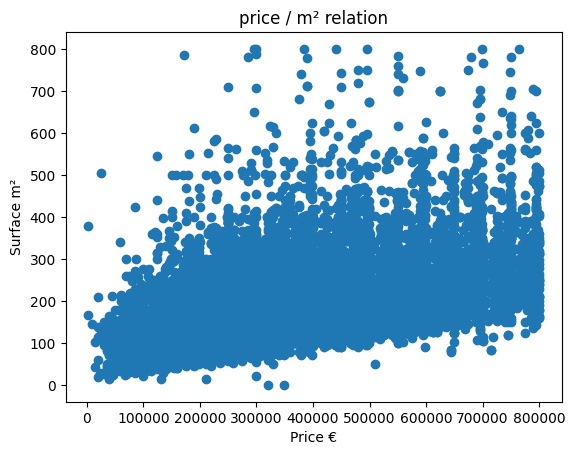

In [ ]:
plt.scatter(df['price'],df['surface'])
plt.title('price / m² relation')
plt.xlabel('Price €')
plt.ylabel('Surface m²')

Text(0, 0.5, 'number of bedrooms')

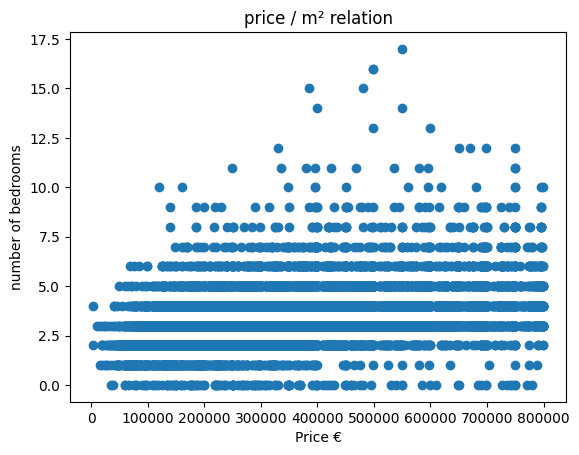

In [ ]:
plt.scatter(df['price'],df['number_of_bedrooms'])
plt.title('price / m² relation')
plt.xlabel('Price €')
plt.ylabel('number of bedrooms')